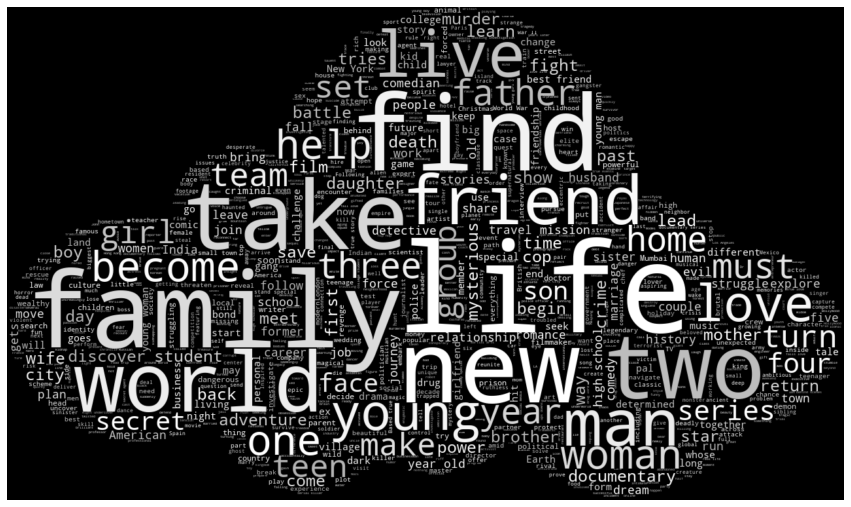

In [84]:
import pandas as pd
import re

import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud

import matplotlib.pyplot as plt

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return("hsl(0, 0%%, %d%%)" % np.random.randint(70,110))

movies = pd.read_csv("Netflix_all.csv")
descriptions = [row.description for index, row in movies.query('description != "-1"').iterrows()]

data = pd.DataFrame.from_dict(unique_words, orient='index').reset_index().rename(columns={"index" : "Noun", 0 : "occurence"})

data2 = pd.DataFrame(descriptions).rename(columns={0:"text"})
text = " ".join(string for string in data2.text)

cloud_mask = np.array(Image.open("cloud_outline.png"))
wordcloud = WordCloud(background_color="black", max_words=1000, mask=cloud_mask).generate(text)
wordcloud.recolor(color_func=grey_color_func)
#wordcloud.to_file("wc_greyscale.png")  

plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

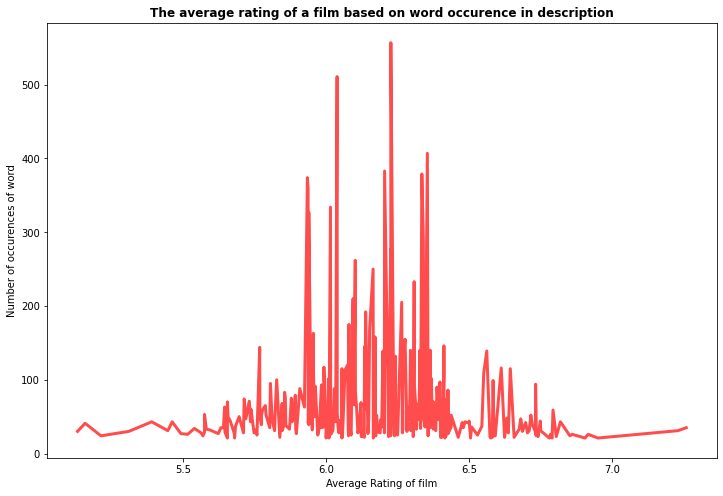

In [138]:
def mean(nums):
    if len(nums) == 0 or nums[0] == -1:
        return -1
    sum = 0
    for i in nums:
        sum += i
    return sum / len(nums)

descs_and_rating = [(row.description, row.averageRating) for index, row in movies.query('description != "-1"').iterrows()]

common_nouns = []
for line in open("nouns.txt", "r"):
    common_nouns.append(ascii(line).replace("'","").split("\\")[0])

descs_and_rating
unique_words = {}
for e in descs_and_rating:
    for j in re.sub(r"[.,/()\-\":]|(\'s)", "", e[0]).split(" "):
        word = j.lower()
        if common_nouns.__contains__(word):
            if word in unique_words:
                unique_words[word] = (unique_words[word][0]+1, unique_words[word][1] + [e[1]])
            else:
                unique_words[word] = (1, [])

for k,v in unique_words.items():
    unique_words[k] = (v[0], mean(v[1]))

data = pd.DataFrame.from_dict(unique_words, orient='index').reset_index().rename(columns={"index" : "Noun", 0 : "occurence", 1 : "averageRating"}).sort_values(by="averageRating", ascending=False)

data = data.query('occurence > 20 and averageRating != -1')
plt.figure(figsize=(12,8))
plt.plot(data['averageRating'], data['occurence'], linewidth=3.0, color="red", alpha=0.7)
plt.xlabel("Average Rating of film")
plt.ylabel("Number of occurences of word")
plt.title("The average rating of a film based on word occurence in description", fontweight="bold")
plt.show();